In [1]:
from mantisshrimp.all import *
import albumentations as A

In [2]:
source = Path('../nbs/samples').absolute()
annot_json = json.load((source/'annotations.json').open())

In [3]:
parser = COCOParser(annot_json, source/'images')
records = parser.parse()


Removed 0 images that don't have annotations


In [4]:
id2cat = {o['id']:o['name'] for o in annot_json['categories']}

In [5]:
record = records[-1]
# show_record(record, figsize=(10,10))

In [6]:
aug = AlbumentationTransformer([A.HorizontalFlip(p=1)])

In [7]:
im, r = aug(record)

In [8]:
tim = im2tensor(im)
target = r.to_rcnn_target()

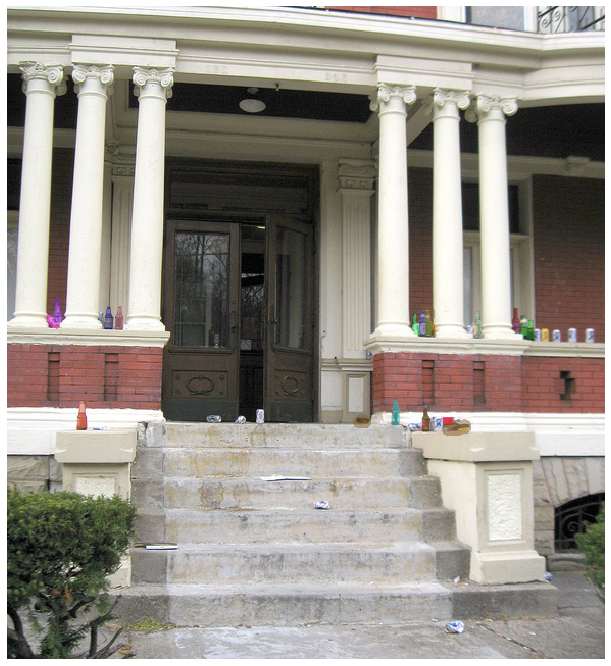

In [10]:
show_record(r, im=im, id2cat=id2cat, figsize=(12,12), bbox=False)

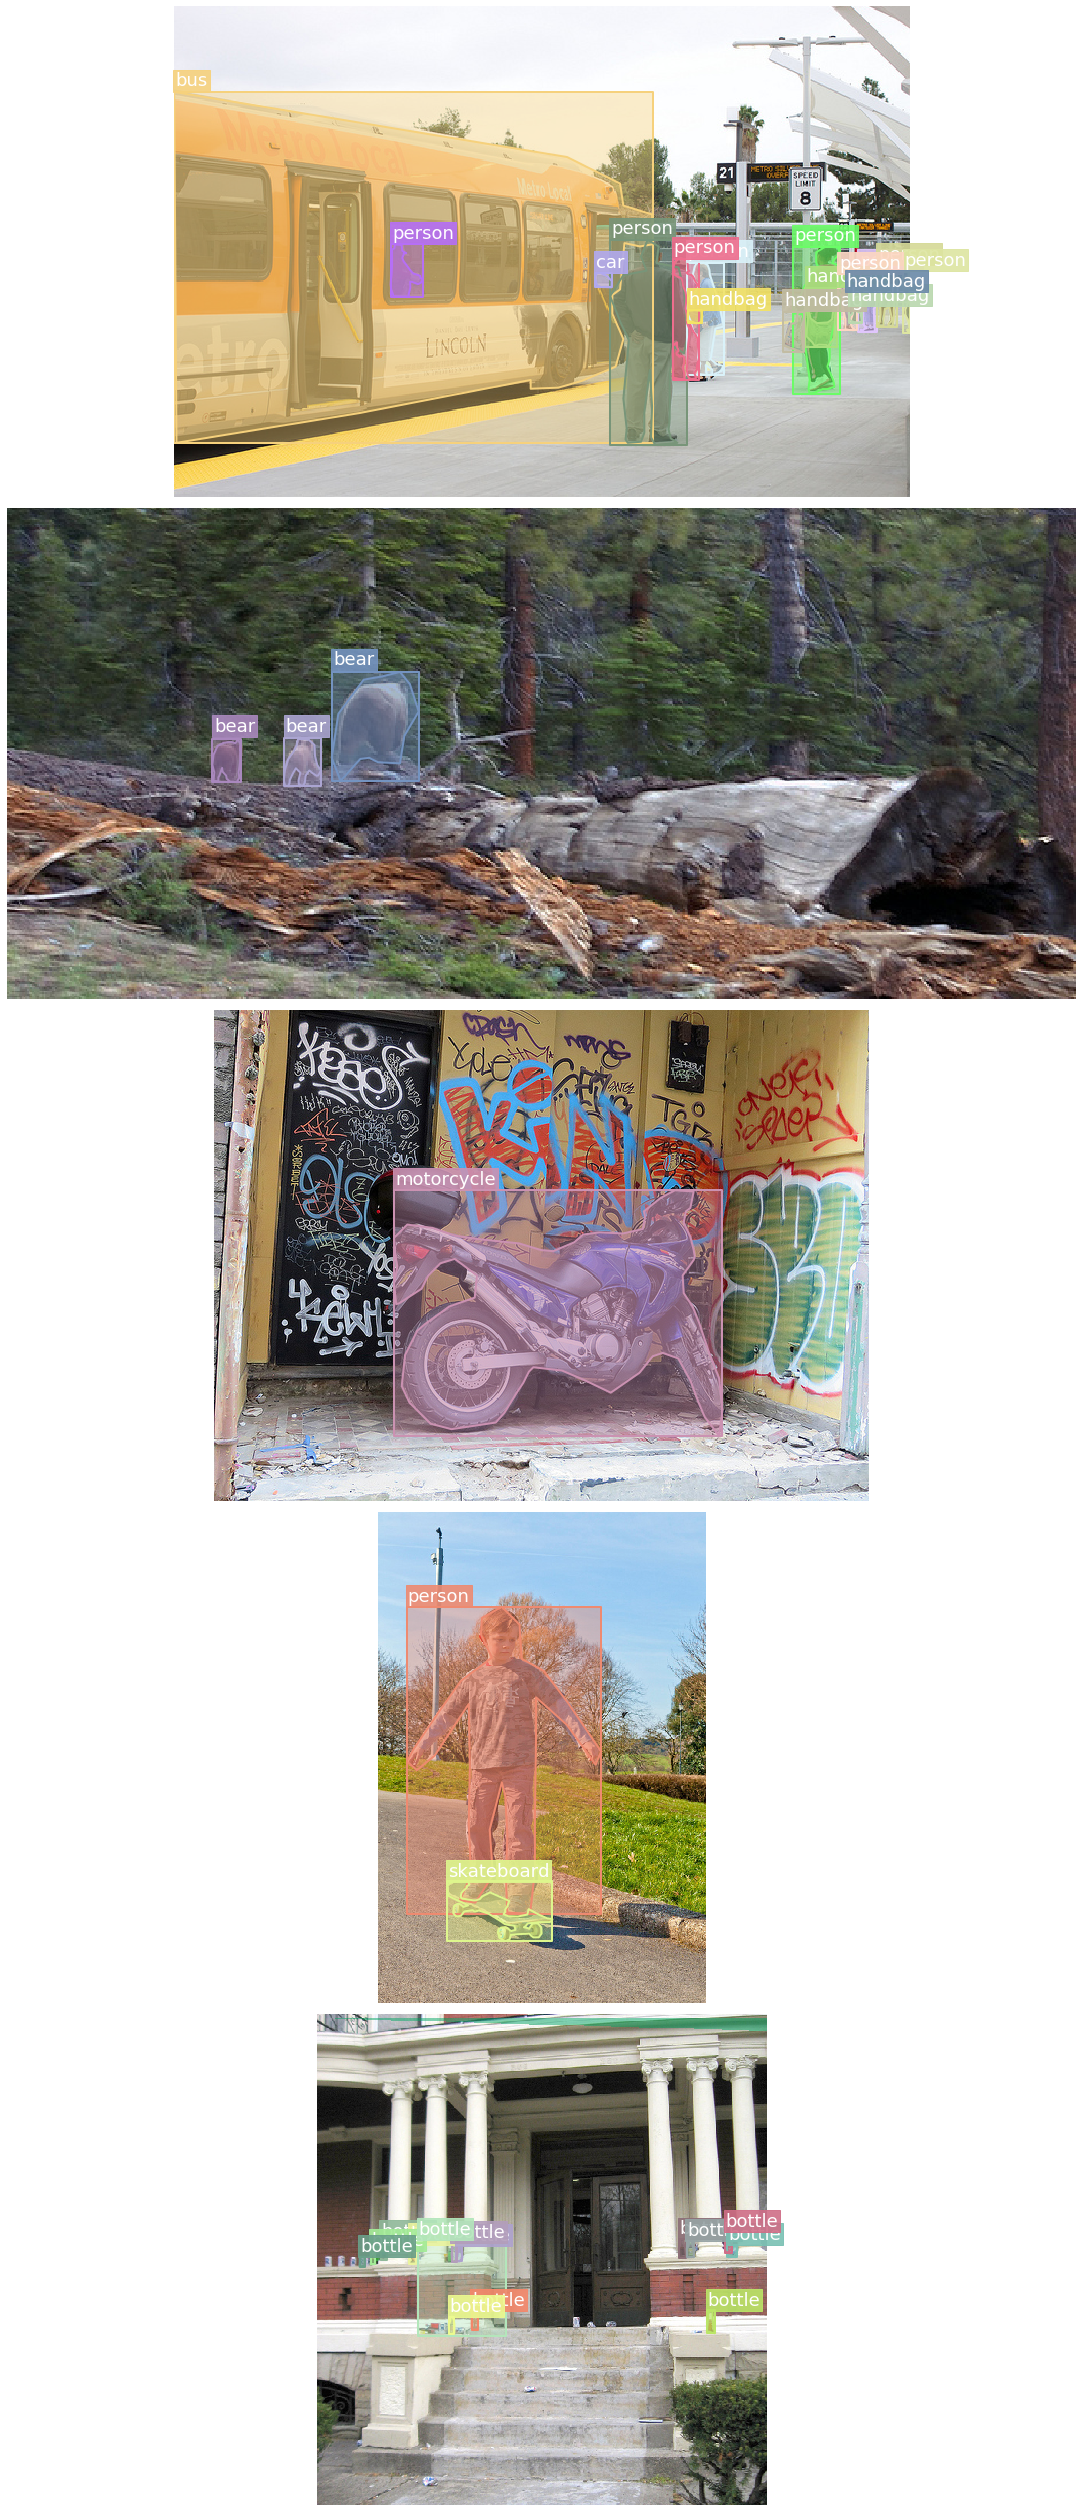

In [12]:
grid(partial(show_record, id2cat=id2cat, draw_bbox=True), records)